## Benchmark 1: 1D Riemann problems

### Simulation parameters


Libraries are imported and program folders and files are defined:

In [15]:
import math                    
import numpy as np             
import matplotlib.pyplot as plt 

folder_case="case"
folder_out="output-files"

fname_config="configure.input"
fname_ini="initial.out"

#data must be deleted before running

Simulation configuration:

In [16]:
#Simulation setup
FinalTime = 0.011
DumpTime = 0.5
CFL = 0.4
Order = 5

#Mesh setup
xcells = 100
ycells = 1
zcells = 1
SizeX = 1.0
SizeY = 1.0
SizeZ = 1.0

#Boundary conditions
Face_1 = 3 #-y
Face_2 = 3 #+x
Face_3 = 3 #+y
Face_4 = 3 #-x
Face_5 = 3 #-z
Face_6 = 3 #+z

#Linear transport, only if applicable
u_x = 1.0
u_y = 1.0
u_z = 1.0



### Initial conditions

In [17]:
dx=SizeX/xcells
dy=SizeY/ycells
dz=SizeZ/zcells

xc=np.zeros((xcells,ycells,zcells))
yc=np.zeros((xcells,ycells,zcells))
zc=np.zeros((xcells,ycells,zcells))

u=np.zeros((xcells,ycells,zcells))
v=np.zeros((xcells,ycells,zcells))
w=np.zeros((xcells,ycells,zcells))
rho=np.zeros((xcells,ycells,zcells))
p=np.zeros((xcells,ycells,zcells))  
phi=np.zeros((xcells,ycells,zcells))  
    
x=np.arange(0+dx/2.0, SizeX, dx)
y=np.arange(0+dy/2.0, SizeY, dy)
z=np.arange(0+dz/2.0, SizeZ, dz)

xc, yc, zc= np.meshgrid(x,y,z,indexing='ij')


In [18]:
case=3

if case==1: #Steady
    for l in range(0,xcells): 
        if (xc[l,:,:]<0.5):
            rho[l,:,:]=1.0
            p  [l,:,:]=1.0
            u  [l,:,:]=0.0
            phi[l,:,:]=1.0
        else:
            rho[l,:,:]=1.0
            p  [l,:,:]=1.0
            u  [l,:,:]=0.0
            phi[l,:,:]=0.0 


if case==2: #RP1 Sod shock
    FinalTime = 0.2
    for l in range(0,xcells): 
        if (xc[l,:,:]<0.5):
            rho[l,:,:]=1.0
            p  [l,:,:]=1.0
            u  [l,:,:]=0.0
            phi[l,:,:]=1/(1.6-1) #1/(gamma-1) for gamma formulation
        else:
            rho[l,:,:]=0.125
            p  [l,:,:]=0.1
            u  [l,:,:]=0.0
            phi[l,:,:]=1/(1.2-1)
    exactS  = np.loadtxt("exact/RP1.txt") 
        
if case==3: #RP2
    FinalTime = 0.011
    for l in range(0,xcells): 
        if (xc[l,:,:]<0.5):
            rho[l,:,:]=1.0
            p  [l,:,:]=1000.0
            u  [l,:,:]=0.0
            phi[l,:,:]=1.0
        else:
            rho[l,:,:]=1.0
            p  [l,:,:]=0.01
            u  [l,:,:]=0.0
            phi[l,:,:]=0.0
    exactS  = np.loadtxt("exact/RP2.txt")  
    
if case==4: #RP3
    FinalTime = 0.035
    for l in range(0,xcells): 
        if (xc[l,:,:]<0.4):
            rho[l,:,:]=5.99924
            p  [l,:,:]=460.894
            u  [l,:,:]=19.5975
            phi[l,:,:]=1.0
        else:
            rho[l,:,:]=5.99242
            p  [l,:,:]=46.0950
            u  [l,:,:]=-6.19633
            phi[l,:,:]=0.0
    exactS  = np.loadtxt("exact/RP3.txt")     

### Writing files

In [19]:
f = open(folder_case+"/"+fname_config, "w")
f.write("/////SIMULATION_SETUP////// \n")
f.write("FinalTime    "+str(FinalTime)+"\n")
f.write("DumpTime    "+str(DumpTime)+"\n")
f.write("CFL    "+str(CFL)+"\n")
f.write("Order    "+str(Order)+"\n")
f.write(" \n")
f.write("////////MESH_SETUP/////////\n")
f.write("xcells    "+str(xcells)+"\n")
f.write("ycells    "+str(ycells)+"\n")
f.write("zcells    "+str(zcells)+"\n")
f.write("SizeX    "+str(SizeX)+"\n")
f.write("SizeY    "+str(SizeY)+"\n")
f.write("SizeZ    "+str(SizeZ)+"\n")
f.write(" \n")
f.write("///////BOUNDARY_COND///////\n")
f.write("Face_1    "+str(Face_1)+"\n")
f.write("Face_2    "+str(Face_2)+"\n")
f.write("Face_3    "+str(Face_3)+"\n")
f.write("Face_4    "+str(Face_4)+"\n")
f.write("Face_5    "+str(Face_5)+"\n")
f.write("Face_6    "+str(Face_6)+"\n")
f.write(" \n")
f.write("///////LINEAR_TRANSPORT///////(if_applicable)\n")
f.write("u_x    "+str(u_x)+"\n")
f.write("u_y    "+str(u_y)+"\n")
f.write("u_z    "+str(u_z)+"\n")
f.close()


f = open(folder_case+"/"+fname_ini, "w")
f.write("VARIABLES = X, Y, Z, u, v, w, rho, p, phi \n")
f.write("CELLS = "+str(xcells)+", "+str(ycells)+", "+str(zcells)+","+"\n")
for l in range(0,xcells):   
    for m in range(0,ycells):
        for n in range(0,zcells):
            f.write(str(xc[l,m,n])+" "+str(yc[l,m,n])+" "+str(zc[l,m,n])+" "+str(u[l,m,n])+" "+str(v[l,m,n])+" "+str(w[l,m,n])+" "+str(rho[l,m,n])+" "+str(p[l,m,n])+" "+str(phi[l,m,n])+"\n")

f.close()         


### Running the code

In [20]:
import subprocess

binary="euler.exe"      

def system_call(command):
    p = subprocess.Popen([command], stdout=subprocess.PIPE, shell=True)
    while True:
        line = p.stdout.readline()
        if not line:
            break
        print(line.rstrip())
    return 1

system_call(binary)

b'The number of threads is set to 2.'
b'Hello from thread 0 of 2.'
b'Hello from thread 1 of 2.'
b''
b'\x1bAuthors:'
b' - Adri\xc3\xa1n Navas Montilla'
b' - Isabel Echeverribar'
b'Copyright (C) 2018-2019 The authors.'
b''
b'License type: Creative Commons Attribution-NonCommercial-NoDerivs 3.0 Spain (CC BY-NC-ND 3.0 ES under the following terms:'
b''
b' - Attribution \xe2\x80\x94 You must give appropriate credit and provide a link to the license.'
b' - NonCommercial \xe2\x80\x94 You may not use the material for commercial purposes.'
b' - NoDerivatives \xe2\x80\x94 If you remix, transform, or build upon the material, you may not distribute the modified material unless explicit permission of the authors is provided.'
b''
b'Disclaimer: This software is distributed for research and/or academic purposes, WITHOUT ANY WARRANTY. In no event shall the authors be liable for any claim, damages or other liability, arising from, out of or in connection with the software or the use or other dealings i

1

### Reading and plotting data:

Reading data:

In [21]:
from glob import glob

files = glob(folder_out+"/list0*")
lf=len(files)

x=np.zeros((xcells,ycells,zcells))
y=np.zeros((xcells,ycells,zcells))
z=np.zeros((xcells,ycells,zcells))

u=np.zeros((xcells,ycells,zcells,lf))
v=np.zeros((xcells,ycells,zcells,lf))
w=np.zeros((xcells,ycells,zcells,lf))
rho=np.zeros((xcells,ycells,zcells,lf))
p=np.zeros((xcells,ycells,zcells,lf))
phi=np.zeros((xcells,ycells,zcells,lf))
E=np.zeros((xcells,ycells,zcells,lf))

gamma=1.4

j=0
for fname in files:
    print(fname+" file read")
    data     = np.loadtxt(fname, skiprows=2)
    k=0
    for l in range(0,xcells):   
        for m in range(0,ycells):
            for n in range(0,zcells):
                #k = l + m*xcells + n*xcells*ycells
                xc[l,m,n]=data[k,0]
                yc[l,m,n]=data[k,1]
                zc[l,m,n]=data[k,2]
                u[l,m,n,j]=data[k,3]
                v[l,m,n,j]=data[k,4]
                w[l,m,n,j]=data[k,5]
                rho[l,m,n,j]=data[k,6]
                p[l,m,n,j]=data[k,7]
                phi[l,m,n,j]=data[k,8]
                #gamma=1.0+1.0/phi[l,m,n,j] #phi = 1/(1-gamma) version
                E[l,m,n,j]=p[l,m,n,j]/(gamma-1.0)+0.5*rho[l,m,n,j]*(u[l,m,n,j]*u[l,m,n,j] + v[l,m,n,j]*v[l,m,n,j] + w[l,m,n,j]*w[l,m,n,j]);
                k+=1 
    j=j+1

output-files\list000.out file read
output-files\list001.out file read


**1D PLOT:**

1.01502080981762
-8.00974869630963e-08


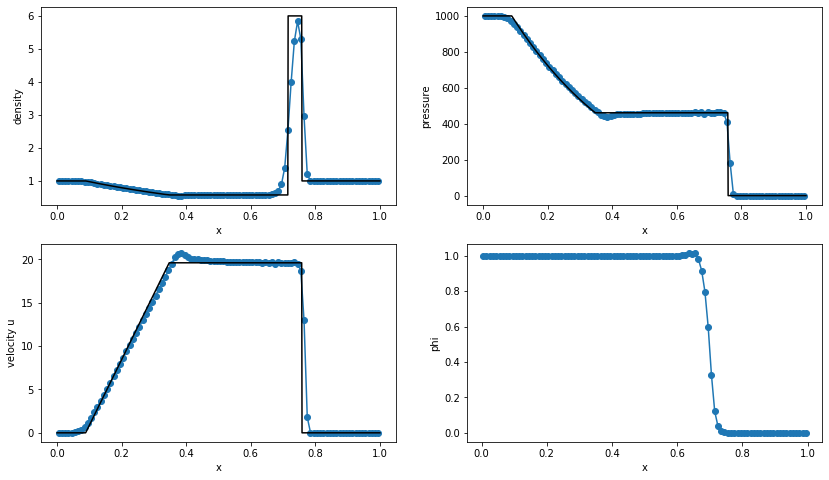

In [22]:
j=1

filename = "doc/bench_RP_"+str(case)

fig, ax  = plt.subplots(2,2,figsize=(14, 8))

ax[0,0].plot(xc[:,0,0],rho[:,0,0,j],'o-')
if 'exactS' in globals():
    ax[0,0].plot(exactS[:,0],exactS[:,1],'k-') 
ax[0,0].set_xlabel("x") 
ax[0,0].set_ylabel("density") 

ax[0,1].plot(xc[:,0,0],p[:,0,0,j],'o-')
if 'exactS' in globals():
    ax[0,1].plot(exactS[:,0],exactS[:,2],'k-') 
ax[0,1].set_xlabel("x") 
ax[0,1].set_ylabel("pressure") 

ax[1,0].plot(xc[:,0,0],u[:,0,0,j],'o-') 
if 'exactS' in globals():
    ax[1,0].plot(exactS[:,0],exactS[:,3],'k-') 
ax[1,0].set_xlabel("x") 
ax[1,0].set_ylabel("velocity u") 

ax[1,1].plot(xc[:,0,0],phi[:,0,0,j],'o-') 
ax[1,1].set_xlabel("x") 
ax[1,1].set_ylabel("phi") 

#ax[2,0].plot(xc[:,0,0],E[:,0,0,j],'o-')  
#ax[2,0].set_xlabel("x") 
#ax[2,0].set_ylabel("energy") 

print(np.max(phi))
print(np.min(phi))


fig.savefig(filename+".png",dpi=500)

## Compare orders

1
output-files\list000.out file read
output-files\list001.out file read
3
output-files\list000.out file read
output-files\list001.out file read
5
output-files\list000.out file read
output-files\list001.out file read
7
output-files\list000.out file read
output-files\list001.out file read


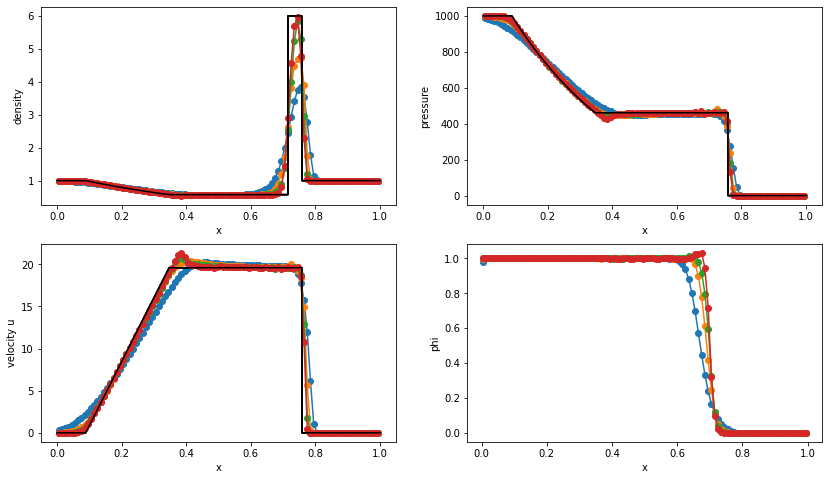

In [19]:
j=1

filename = "doc/bench_RP_comp_"+str(case)
fig, ax  = plt.subplots(2,2,figsize=(14,8))


for mm in [1,3,5,7]:
    Order = mm
    print(Order)

    f = open(folder_case+"/"+fname_config, "w")
    f.write("/////SIMULATION_SETUP////// \n")
    f.write("FinalTime    "+str(FinalTime)+"\n")
    f.write("DumpTime    "+str(DumpTime)+"\n")
    f.write("CFL    "+str(CFL)+"\n")
    f.write("Order    "+str(Order)+"\n")
    f.write(" \n")
    f.write("////////MESH_SETUP/////////\n")
    f.write("xcells    "+str(xcells)+"\n")
    f.write("ycells    "+str(ycells)+"\n")
    f.write("zcells    "+str(zcells)+"\n")
    f.write("SizeX    "+str(SizeX)+"\n")
    f.write("SizeY    "+str(SizeY)+"\n")
    f.write("SizeZ    "+str(SizeZ)+"\n")
    f.write(" \n")
    f.write("///////BOUNDARY_COND///////\n")
    f.write("Face_1    "+str(Face_1)+"\n")
    f.write("Face_2    "+str(Face_2)+"\n")
    f.write("Face_3    "+str(Face_3)+"\n")
    f.write("Face_4    "+str(Face_4)+"\n")
    f.write("Face_5    "+str(Face_5)+"\n")
    f.write("Face_6    "+str(Face_6)+"\n")
    f.write(" \n")
    f.write("///////LINEAR_TRANSPORT///////(if_applicable)\n")
    f.write("u_x    "+str(u_x)+"\n")
    f.write("u_y    "+str(u_y)+"\n")
    f.write("u_z    "+str(u_z)+"\n")
    f.close()
    
    binary="euler.exe"      

    def system_call(command):
        p = subprocess.Popen([command], stdout=subprocess.PIPE, shell=True)
        while True:
            line = p.stdout.readline()
            if not line:
                break
            #print(line.rstrip())
        return 1

    system_call(binary)
    
    j=0
    for fname in files:
        print(fname+" file read")
        data     = np.loadtxt(fname, skiprows=2)
        k=0
        for l in range(0,xcells):   
            for m in range(0,ycells):
                for n in range(0,zcells):
                    #k = l + m*xcells + n*xcells*ycells
                    xc[l,m,n]=data[k,0]
                    yc[l,m,n]=data[k,1]
                    zc[l,m,n]=data[k,2]
                    u[l,m,n,j]=data[k,3]
                    v[l,m,n,j]=data[k,4]
                    w[l,m,n,j]=data[k,5]
                    rho[l,m,n,j]=data[k,6]
                    p[l,m,n,j]=data[k,7]
                    phi[l,m,n,j]=data[k,8]
                    #gamma=1.0+1.0/phi[l,m,n,j] #phi = 1/(1-gamma) version
                    E[l,m,n,j]=p[l,m,n,j]/(gamma-1.0)+0.5*rho[l,m,n,j]*(u[l,m,n,j]*u[l,m,n,j] + v[l,m,n,j]*v[l,m,n,j] + w[l,m,n,j]*w[l,m,n,j]);
                    k+=1       
        j=j+1
      
    
    j=1
    ax[0,0].plot(xc[:,0,0],rho[:,0,0,j],'o-')
    if 'exactS' in globals():
        ax[0,0].plot(exactS[:,0],exactS[:,1],'k-') 
    ax[0,0].set_xlabel("x") 
    ax[0,0].set_ylabel("density") 

    ax[0,1].plot(xc[:,0,0],p[:,0,0,j],'o-')
    if 'exactS' in globals():
        ax[0,1].plot(exactS[:,0],exactS[:,2],'k-') 
    ax[0,1].set_xlabel("x") 
    ax[0,1].set_ylabel("pressure") 

    ax[1,0].plot(xc[:,0,0],u[:,0,0,j],'o-') 
    if 'exactS' in globals():
        ax[1,0].plot(exactS[:,0],exactS[:,3],'k-') 
    ax[1,0].set_xlabel("x") 
    ax[1,0].set_ylabel("velocity u") 

    ax[1,1].plot(xc[:,0,0],phi[:,0,0,j],'o-') 
    ax[1,1].set_xlabel("x") 
    ax[1,1].set_ylabel("phi") 
    
    
    
    
fig.savefig(filename+".png",dpi=500)

In [20]:
#Author:
# - Adrián Navas Montilla
#
#Copyright (C) 2021 The author.  
#
#License type: Creative Commons Attribution-NonCommercial-NoDerivs 3.0 Spain (CC BY-NC-ND 3.0 ES https://creativecommons.org/licenses/by-nc-nd/3.0/es/deed.en) under the following terms: 
#
#- Attribution — You must give appropriate credit and provide a link to the license.
#- NonCommercial — You may not use the material for commercial purposes.
#- NoDerivatives — If you remix, transform, or build upon the material, you may not distribute the modified material unless explicit permission of the authors is provided. 
#
#Disclaimer: This software is distributed for research and/or academic purposes, WITHOUT ANY WARRANTY. In no event shall the authors be liable for any claim, damages or other liability, arising from, out of or in connection with the software or the use or other dealings in this software.
